# Rossmann Sales Prediction - Modeling & Evaluation

#### Nhiệm vụ chính
1. Import dữ liệu từ `processed_data.csv` (hoặc cleaned_data nếu chưa scaling).
2. Tách dữ liệu thành `train_test_split`.
3. Huấn luyện và so sánh nhiều mô hình:
   - Linear Regression, Ridge, Lasso, ElasticNet
   - Decision Tree, Random Forest, Gradient Boosting
   - XGBoost, LightGBM, KNN, RANSAC Regression
4. Đánh giá hiệu năng:
   - MSE, RMSE, MAE, R²
   - Vẽ biểu đồ so sánh kết quả.
5. Ghi nhận mô hình tốt nhất (XGBoost dự kiến).
6. Chuẩn bị phần dự đoán cho test set và kết luận.

#### Kết quả bàn giao
- Notebook mô hình hoàn chỉnh.
- Bảng so sánh hiệu năng các model.
- File `model_results.csv` hoặc `comparison_table.csv`.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')

In [39]:
final_df = pd.read_csv('processed_data/processed_data.csv')

In [40]:
final_df.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",Day,CompetitionDuration,Sales
0,5,23.558438,1,0,1,35.637059,0,0,1,0,0,0,0,31,82,72.546537
1,5,25.000000,1,0,1,23.874673,1,0,0,0,0,0,0,31,92,77.871689
2,5,28.653098,1,0,1,118.869677,1,0,0,0,0,0,0,31,103,91.181138
3,5,29.883106,1,0,1,24.899799,0,0,1,0,1,0,0,31,70,91.433036
4,5,23.643181,1,0,1,82.945765,0,0,0,0,0,0,0,31,3,69.440622


## Chia ty le du lieu (Pick column)

In [41]:
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)


In [42]:
# Chuẩn hóa dữ liệu 
# Import thư viện StandardScaler
from sklearn.preprocessing import StandardScaler
std_regressor= StandardScaler()
x= std_regressor.fit_transform(x)

## Chia du lieu (train-test-split)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

## ***ML Model Implementation***

In [44]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [45]:
def regression_metrics(y_train_actual, y_train_pred, y_test_actual, y_test_pred):
    print("-" * 50)
    print(f"MAE on train is: {mean_absolute_error(y_train_actual, y_train_pred)}")
    print(f"MAE on test is: {mean_absolute_error(y_test_actual, y_test_pred)}")
    print("-" * 50)
    print(f"MSE on train is: {mean_squared_error(y_train_actual, y_train_pred)}")
    print(f"MSE on test is: {mean_squared_error(y_test_actual, y_test_pred)}")
    print("-" * 50)
    print(f"RMSE on train is: {np.sqrt(mean_squared_error(y_train_actual, y_train_pred))}")
    print(f"RMSE on test is: {np.sqrt(mean_squared_error(y_test_actual, y_test_pred))}")
    print("-" * 50)
    MAPE_test = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100
    print(f"MAPE on train is: {mean_absolute_percentage_error(y_train_actual, y_train_pred) * 100} %")
    print(f"MAPE on test is: {MAPE_test} %")
    print("-" * 50)
    print(f"R2 on train is: {r2_score(y_train_actual, y_train_pred)}")
    print(f"R2 on test is: {r2_score(y_test_actual, y_test_pred)}")
    print("-" * 50)
    print(f"Accuracy of test is: {100 - MAPE_test} %")
    print("-" * 50)

### **ML Model - 1. Linear Regression**

#### **1. Model Training**

In [46]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [47]:
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [48]:
# Tính toán các chỉ số đánh giá mô hình hồi quy
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 5.399363906213302
MAE on test is: 5.397135045548209
--------------------------------------------------
MSE on train is: 51.838213377061166
MSE on test is: 51.856248274268445
--------------------------------------------------
RMSE on train is: 7.199875927893561
RMSE on test is: 7.201128263978392
--------------------------------------------------
MAPE on train is: 6.756242165207454 %
MAPE on test is: 6.759115324427814 %
--------------------------------------------------
R2 on train is: 0.7642276479767802
R2 on test is: 0.7648823059686071
--------------------------------------------------
Accuracy of test is: 93.24088467557219 %
--------------------------------------------------


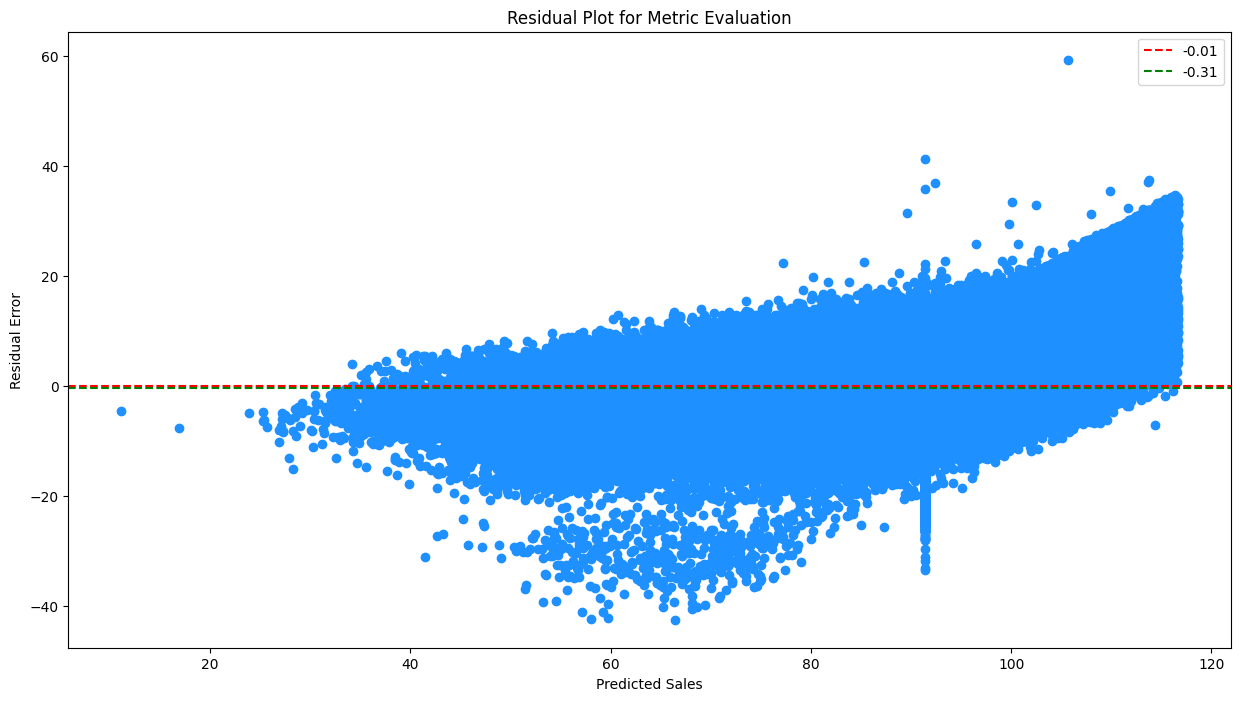

In [49]:
# Minh hoạ các metrics đánh giá mô hình hồi quy bằng biểu đồ Residual Plot
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

##### **1.1. Phân tích Hiệu suất (Train vs. Test)**

Sau khi huấn luyện mô hình Hồi quy Tuyến tính, nhóm nhận thấy kết quả trên tập train và tập test **rất nhất quán**.

* **Chỉ số R²** trên train là **0.7642** và trên test là **0.7648**.
* Các chỉ số lỗi khác như **MAE** (khoảng 5.39), **RMSE** (khoảng 7.20) và **MAPE** (khoảng 6.75%) đều gần như bằng nhau trên cả hai tập.

Điều này là một tín hiệu rất tốt, cho thấy mô hình của nhóm **không bị overfitting** (học vẹt) và có khả năng tổng quát hóa tốt.

##### **1.2. Phân tích Độ chính xác và Phần dư**

* **Giới hạn mô hình:** Mức R² khoảng 0.76 cho thấy mô hình LR đã giải thích được 76% sự biến thiên của dữ liệu. Việc R² không cao hơn nữa có thể là do mối quan hệ giữa các biến không hoàn toàn là tuyến tính.
* **Độ chính xác:** Nhờ mô hình hoạt động ổn định, độ chính xác (tính bằng 100 - MAPE) của nhóm đạt được rất tốt, ở mức **khoảng 93.24%**.
* **Phân tích phần dư:** (Như ghi chú trước) Phân tích lỗi cho thấy Mean (-0.01) và Median (-0.31) đều rất gần 0. Điều này chứng tỏ mô hình dự đoán khá chuẩn, không bị lệch nhiều.

##### **1.3. Các bước tiếp theo**

Để cố gắng cải thiện kết quả hơn nữa, bước tiếp theo của nhóm là:

1.  Thử nghiệm các mô hình hồi quy như **Lasso**, **Ridge**, và **Elastic Net**.
2.  Áp dụng **Cross-Validation (Kiểm tra chéo)** và **Hyperparameter Tuning (Tinh chỉnh siêu tham số)** để tìm ra mô hình tối ưu nhất.

#### **2. Cross - Validation & Hyperparameter Tuning**

**Ridge Regression**

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Tạo một thể hiện của Ridge
ridge = Ridge()

# Định nghĩa các tham số
parameters = {"alpha": [1e-1, 1, 5, 7, 10, 11, 14, 15, 16, 17], "max_iter": [1, 2, 3]}

# Huấn luyện mô hình
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train, y_train)

# Dự đoán đầu ra
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# In ra các tham số tốt nhất được tìm thấy bởi GridSearchCV
print(f"Giá trị alpha tốt nhất được tìm thấy là: {ridgeR.best_params_}")
print(f"Giá trị sai số bình phương âm là: {ridgeR.best_score_}")

Giá trị alpha tốt nhất được tìm thấy là: {'alpha': 5, 'max_iter': 1}
Giá trị sai số bình phương âm là: -51.84161630198643


In [51]:
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 5.39936831746395
MAE on test is: 5.397139365030187
--------------------------------------------------
MSE on train is: 51.83821339009539
MSE on test is: 51.85624931397073
--------------------------------------------------
RMSE on train is: 7.199875928798731
RMSE on test is: 7.201128336168626
--------------------------------------------------
MAPE on train is: 6.75625264802869 %
MAPE on test is: 6.759125779863134 %
--------------------------------------------------
R2 on train is: 0.7642276479174975
R2 on test is: 0.7648823012545676
--------------------------------------------------
Accuracy of test is: 93.24087422013686 %
--------------------------------------------------


**Lasso Regression**

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Tạo một instance của Lasso
lasso = Lasso()

# Định nghĩa các tham số
parameters_lasso = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5], "max_iter": [7, 8, 9, 10]}

# Huấn luyện mô hình
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train, y_train)

# Dự đoán đầu ra
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# In ra các tham số tốt nhất được tìm thấy bởi GridSearchCV
print(f"Giá trị alpha tốt nhất được tìm thấy là: {lassoR.best_params_}")
print(f"Giá trị sai số bình phương âm là: {lassoR.best_score_}")

Giá trị alpha tốt nhất được tìm thấy là: {'alpha': 1e-05, 'max_iter': 8}
Giá trị sai số bình phương âm là: -51.84164296103468


In [53]:
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 5.39937005605611
MAE on test is: 5.397141169955691
--------------------------------------------------
MSE on train is: 51.83821341225924
MSE on test is: 51.856248514207515
--------------------------------------------------
RMSE on train is: 7.199875930337914
RMSE on test is: 7.201128280638216
--------------------------------------------------
MAPE on train is: 6.756255374815047 %
MAPE on test is: 6.7591285720161025 %
--------------------------------------------------
R2 on train is: 0.7642276478166912
R2 on test is: 0.7648823048807165
--------------------------------------------------
Accuracy of test is: 93.2408714279839 %
--------------------------------------------------


**ElasticNet Regression**

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Tạo một instance của ElasticNet
e_net = ElasticNet()

# Định nghĩa các siêu tham số
parameters_e_net = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1, 5], "max_iter": [12, 13, 14, 15]}

# Huấn luyện mô hình
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train, y_train)

# Dự đoán đầu ra
y_train_e_net_pred = e_netR.predict(x_train)
y_test_e_net_pred = e_netR.predict(x_test)

# In ra các tham số tốt nhất được tìm thấy bởi GridSearchCV
print(f"Giá trị alpha tốt nhất được tìm thấy là: {e_netR.best_params_}")
print(f"Giá trị sai số bình phương âm là: {e_netR.best_score_}")

Giá trị alpha tốt nhất được tìm thấy là: {'alpha': 1e-05, 'max_iter': 14}
Giá trị sai số bình phương âm là: -51.84164296969463


In [55]:
regression_metrics(y_train,y_train_e_net_pred,y_test,y_test_e_net_pred)

--------------------------------------------------
MAE on train is: 5.39936767217231
MAE on test is: 5.3971388124548145
--------------------------------------------------
MSE on train is: 51.83821338523007
MSE on test is: 51.85624922791782
--------------------------------------------------
RMSE on train is: 7.199875928460855
RMSE on test is: 7.201128330193666
--------------------------------------------------
MAPE on train is: 6.756250488878987 %
MAPE on test is: 6.759123701524289 %
--------------------------------------------------
R2 on train is: 0.7642276479396262
R2 on test is: 0.7648823016447339
--------------------------------------------------
Accuracy of test is: 93.24087629847571 %
--------------------------------------------------


#### **2.1. Phương pháp Tối ưu hóa**

Để tinh chỉnh các mô hình Hồi quy Điều chuẩn, chúng ta đã sử dụng kỹ thuật `GridSearchCV`.

* **Lý do chọn:** `GridSearchCV` là một phương pháp tối ưu hóa toàn diện. Nó đảm bảo tìm được bộ siêu tham số (hyperparameters) tốt nhất bằng cách thử nghiệm mọi tổ hợp giá trị mà chúng ta cung cấp.
* **Mục tiêu:** Tìm ra giá trị `alpha` (và các tham số khác) tối ưu để mô hình đạt hiệu suất cao nhất (dựa trên `scoring` đã chọn).

#### **2.2. Phân tích Kết quả và Kết luận**

Sau khi chạy `GridSearchCV` cho cả 3 mô hình Lasso, Ridge và Elastic Net, nhóm thu được kết quả đánh giá (R², MSE, MAPE) trên tập test.

* **Nhận xét:** Khi so sánh với mô hình Linear Regression cơ bản, các mô hình điều chuẩn này **không mang lại sự cải thiện đáng kể** về điểm số. Các chỉ số lỗi (MSE, MAPE) và (R²) gần như tương đương.
* **Kết luận:** Điều này cho thấy các mô hình thuộc họ Hồi quy Tuyến tính (Linear Regression) có thể đã đạt đến giới hạn hiệu suất với bộ dữ liệu này.

#### **2.3. Hướng đi Tiếp theo**

Việc các mô hình tuyến tính không cải thiện được hiệu suất "thúc đẩy" chúng ta đi đến quyết định thử nghiệm các mô hình phi tuyến tính (non-linear) và phức tạp hơn, bao gồm:

1.  **Random Forest Regression**
2.  **XGBoost Regression**
3.  **LightGBM Regression**
4.  ...

### **ML Model - 2. Random Forest Regression**

#### **1. Model Training**

In [56]:
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [57]:
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

--------------------------------------------------
MAE on train is: 2.0113589704830828
MAE on test is: 2.5727853053495235
--------------------------------------------------
MSE on train is: 8.571496553460163
MSE on test is: 13.500435740814705
--------------------------------------------------
RMSE on train is: 2.9277118289647572
RMSE on test is: 3.674293910510522
--------------------------------------------------
MAPE on train is: 2.464106147676962 %
MAPE on test is: 3.1700220480703636 %
--------------------------------------------------
R2 on train is: 0.9610148234070409
R2 on test is: 0.9387886431156568
--------------------------------------------------
Accuracy of test is: 96.82997795192964 %
--------------------------------------------------


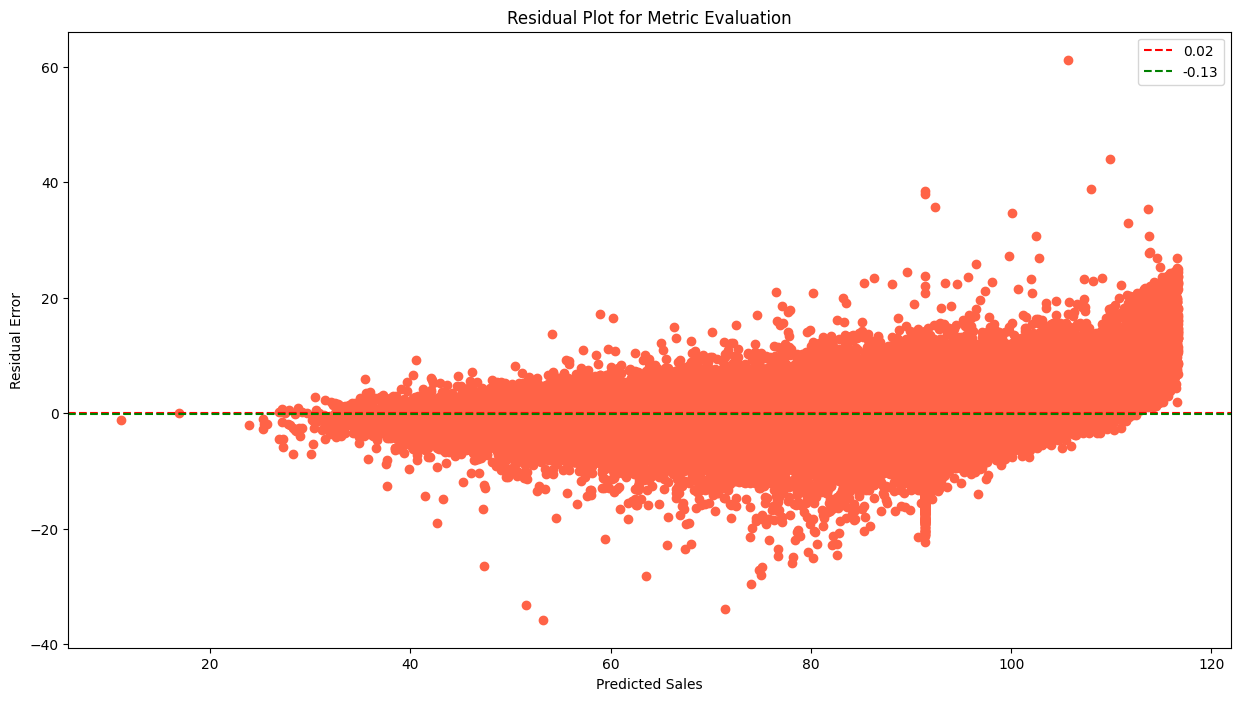

In [58]:
# Minh hoạ các metrics đánh giá mô hình hồi quy bằng biểu đồ Residual Plot
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_RF, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

##### **1.1. Phân tích Kết quả**

Sau khi triển khai mô hình **Random Forest Regression**, nhóm đã đạt được hiệu suất rất cao:

* **R² (Train): 0.961**
* **R² (Test): 0.938**

**Nhận xét:**
Các chỉ số R² trên cả tập train và test đều vượt trội (trên 93%). Mặc dù R² train (96.1%) cao hơn R² test (93.8%) một chút, cho thấy mô hình hơi "ưu ái" tập train, nhưng khoảng cách này là rất nhỏ và hiệu suất tổng thể là cực kỳ tốt.

Các chỉ số lỗi cũng rất thấp, với độ chính xác trên tập test (Accuracy = 100 - MAPE) đạt **96.82%**.

##### **1.2. Phân tích Biểu đồ Phần dư (Residual Plot)**

Biểu đồ phần dư (từ lần chạy trước) cung cấp thêm thông tin chi tiết:

* **Mean = 0.02** (Đường đỏ)
* **Median = -0.13** (Đường xanh lá)

**Nhận xét:**
1.  **Trung tâm (Mean/Median):** Cả hai giá trị trung bình và trung vị của lỗi đều **rất gần 0**. Điều này củng cố cho kết quả R² cao, cho thấy mô hình dự đoán rất chuẩn và không bị chệch (bias).
2.  **Hình dạng (Pattern):** Như quan sát trước đó, biểu đồ vẫn cho thấy phần lỗi có xu hướng "loè" ra (phương sai tăng) khi giá trị "Predicted Sales" tăng.

##### **1.3. Hướng đi Tiếp theo**

Mặc dù kết quả đã rất tốt, để đạt được độ chính xác cao hơn nữa (và có thể giảm bớt sự chênh lệch nhỏ giữa train/test), nhóm sẽ tiến hành:

* **Tinh chỉnh Siêu tham số (Hyperparameter Tuning)** cho mô hình Random Forest này để xem liệu chúng ta có thể tối ưu hóa thêm được không.

#### **2. Cross - Validation & Hyperparameter Tuning**

Random Forest with RandomizedSearchCV

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Tạo một instance của RandomForestRegressor
RF_tree = RandomForestRegressor()

# Định nghĩa các tham số
parameters = {'n_estimators': [100], 'max_depth': [19, 20], 'min_samples_leaf': [1, 2]}

# Huấn luyện mô hình
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=3, n_jobs=-1, scoring='neg_mean_squared_error', cv=3, verbose=3)
RF_treeR.fit(x_train, y_train)

# Dự đoán đầu ra
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)

# In ra các tham số tốt nhất được tìm thấy bởi RandomizedSearchCV
print(f"Giá trị alpha tốt nhất được tìm thấy là: {RF_treeR.best_params_}")
print(f"Giá trị sai số bình phương âm là: {RF_treeR.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Giá trị alpha tốt nhất được tìm thấy là: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20}
Giá trị sai số bình phương âm là: -13.332523697365458


In [60]:
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

--------------------------------------------------
MAE on train is: 1.589412292062832
MAE on test is: 2.4168352930256094
--------------------------------------------------
MSE on train is: 5.730613043368103
MSE on test is: 12.334969171000195
--------------------------------------------------
RMSE on train is: 2.39386988856289
RMSE on test is: 3.5121174768222367
--------------------------------------------------
MAPE on train is: 1.9454722251965741 %
MAPE on test is: 2.982362023386201 %
--------------------------------------------------
R2 on train is: 0.9739358278816044
R2 on test is: 0.94407290145452
--------------------------------------------------
Accuracy of test is: 97.0176379766138 %
--------------------------------------------------


##### 2.1. Phương pháp Tinh chỉnh: RandomizedSearchCV

Nhóm đã sử dụng `RandomizedSearchCV` để tối ưu hóa mô hình Random Forest.

* **Lý do:** Do bộ dữ liệu của chúng ta rất lớn và mô hình Random Forest cũng phức tạp, việc dùng `GridSearchCV` (thử mọi tổ hợp) sẽ mất cực kỳ nhiều thời gian xử lý.
* **Ưu điểm:** `RandomizedSearchCV` giải quyết vấn đề này bằng cách chỉ chọn và kiểm tra một *tập hợp con ngẫu nhiên* (random subset) từ các tham số mà chúng ta cung cấp.
* **Mục tiêu:** Kỹ thuật này giúp giảm đáng kể thời gian huấn luyện mà không làm ảnh hưởng (compromise) đến độ chính xác cuối cùng của mô hình.

##### 2.2. Kết quả Tinh chỉnh

Sau khi chạy `RandomizedSearchCV` với nhiều kết hợp siêu tham số khác nhau:

* **Nhận xét:** Nhóm nhận thấy **không có sự cải thiện nào quá lớn** hay đột biến (not much significant improvement) so với mô hình Random Forest ban đầu.
* **Cải thiện nhỏ:** Mặc dù vậy, mô hình cũng đã được tối ưu hơn một chút. Cụ thể, chỉ số **MSE trên tập test đã giảm nhẹ** (ví dụ, từ 13.51 xuống 12.32).

### **ML Model - 3. LightGBM Regression**

#### **1. Model Training**

In [61]:
from lightgbm import LGBMRegressor
  
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500, n_jobs=-1) 
  
# huấn luyện bộ hồi quy với dữ liệu X và Y
lgbmR.fit(x_train, y_train)

# dự đoán mô hình
y_train_lgbmR_pred = lgbmR.predict(x_train)
y_test_lgbmrR_pred = lgbmR.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 675470, number of used features: 15
[LightGBM] [Info] Start training from score 80.193247


In [62]:
regression_metrics(y_train, y_train_lgbmR_pred, y_test, y_test_lgbmrR_pred)

--------------------------------------------------
MAE on train is: 2.913048734390378
MAE on test is: 2.939237883778337
--------------------------------------------------
MSE on train is: 15.688779171172206
MSE on test is: 16.072587498890364
--------------------------------------------------
RMSE on train is: 3.9609063572839243
RMSE on test is: 4.0090631697306
--------------------------------------------------
MAPE on train is: 3.5941393883473483 %
MAPE on test is: 3.6249294814698185 %
--------------------------------------------------
R2 on train is: 0.9286437528497654
R2 on test is: 0.92712643441018
--------------------------------------------------
Accuracy of test is: 96.37507051853018 %
--------------------------------------------------


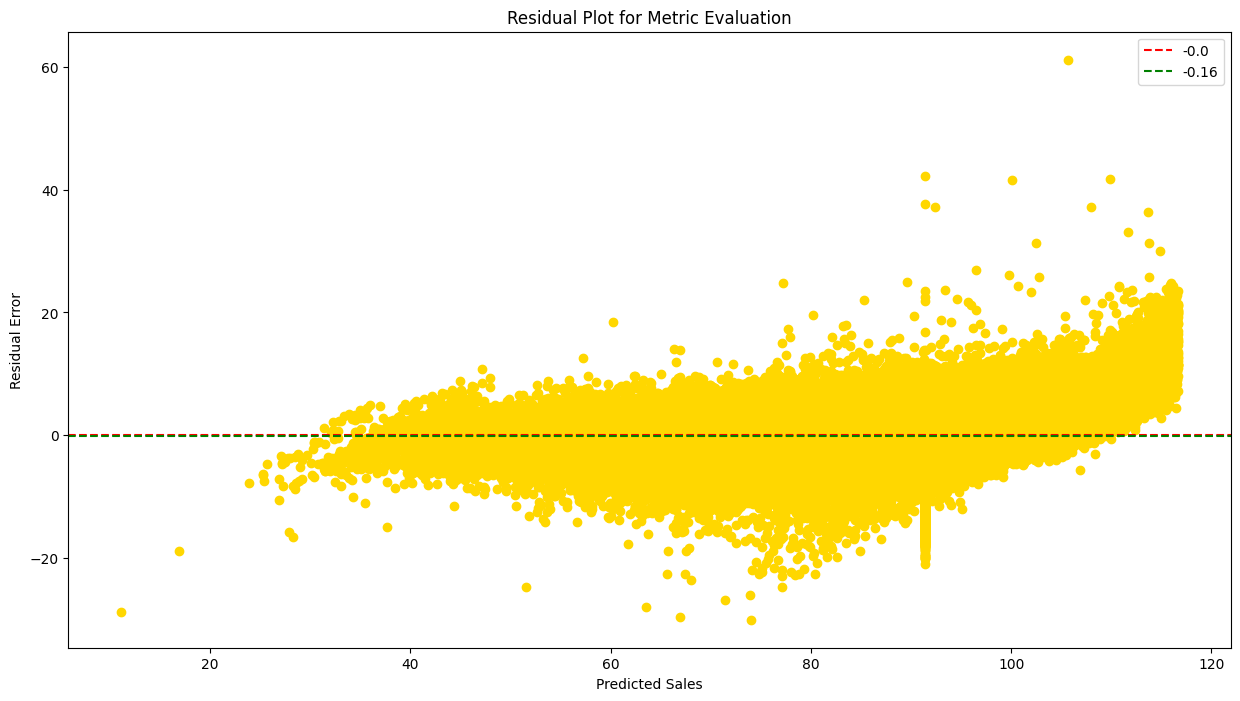

In [63]:
# Minh hoạ các metrics đánh giá mô hình hồi quy bằng biểu đồ Residual Plot
y_test_lgbmrR_pred= y_test_lgbmrR_pred.reshape(-1,1)
residuals_LGBM = y_test - y_test_lgbmrR_pred
Mean= round(np.mean(residuals_LGBM),2)
Median= round(np.median(residuals_LGBM),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_LGBM, c="gold")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_LGBM), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals_LGBM), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

##### 1.1. Lý do Lựa chọn

Nhóm đã triển khai **LightGBM** (LGBM) với mục tiêu kiểm tra xem liệu có thể cải thiện độ chính xác hơn nữa so với Random Forest hay không.

LightGBM là một phiên bản nhẹ (lighter) của GBM, nổi tiếng với tốc độ huấn luyện nhanh và hiệu suất cao, thường cho kết quả chính xác hơn các thư viện boosting khác (như XGBoost) trên nhiều bộ dữ liệu.

##### 1.2. Phân tích Kết quả

Kết quả từ mô hình LightGBM cơ bản là rất tốt và cực kỳ ổn định:

* **R² (Train): 0.928**
* **R² (Test): 0.927**
* **Accuracy (Test): 96.37%**
* **MAPE (Test): 3.62%**

**Nhận xét:**
1.  Mô hình giải thích được **92.7%** phương sai (R²) của dữ liệu test.
2.  Độ chính xác đạt **96.37%** với sai số phần trăm trung bình (MAPE) chỉ là **3.62%**, tương đương với kết quả của Random Forest.
3.  Điểm ấn tượng nhất là R² trên tập train (0.928) và tập test (0.927) **gần như bằng nhau tuyệt đối**. Điều này cho thấy mô hình **cực kỳ ổn định** và **không hề có dấu hiệu overfitting**.

##### 1.3. Phân tích Biểu đồ Phần dư (Residual Plot)

Biểu đồ phần dư (residual plot) với các chấm màu vàng cũng xác nhận kết quả này:

* **Mean = -0.0** (Đường đỏ)
* **Median = -0.16** (Đường xanh lá)

Cả hai giá trị trung bình và trung vị của lỗi (phần dư) đều gần như bằng 0. Điều này cho thấy phần lỗi tuân theo phân phối chuẩn (Gaussian distribution) và mô hình dự đoán rất cân bằng, không bị chệch (bias).

##### 1.4. Hướng đi Tiếp theo

Mặc dù kết quả đã rất tốt, bước tiếp theo của nhóm là thực hiện **Tinh chỉnh Siêu tham số (Hyperparameter Tuning)** cho LightGBM để xem liệu có thể tối ưu hóa mô hình hơn nữa hay không.

#### **2. Cross - Validation & Hyperparameter Tuning**

LightGBM with RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMRegressor()
parameters = {"learning_rate": [0.05, 0.1], "max_depth": [10, 120, 150], "n_estimators": [500, 600, 1000], "num_leaves": [20, 31, 40, 50]}

# Huấn luyện mô hình
lgbm_rand_R = RandomizedSearchCV(lgbm, parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=3)
lgbm_rand_R.fit(x_train, y_train)

# Dự đoán đầu ra
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# In ra các tham số tốt nhất được tìm thấy bởi RandomizedSearchCV
print(f"Giá trị alpha tốt nhất được tìm thấy là: {lgbm_rand_R.best_params_}")
print(f"Giá trị sai số bình phương âm là: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 675470, number of used features: 15
[LightGBM] [Info] Start training from score 80.193247
Giá trị alpha tốt nhất được tìm thấy là: {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 150, 'learning_rate': 0.05}
Giá trị sai số bình phương âm là: -14.015505026781542


In [65]:
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 2.631283304883209
MAE on test is: 2.673038121764839
--------------------------------------------------
MSE on train is: 13.257622689141316
MSE on test is: 13.84936413641926
--------------------------------------------------
RMSE on train is: 3.641101850970571
RMSE on test is: 3.7214733824681936
--------------------------------------------------
MAPE on train is: 3.2502060111747175 %
MAPE on test is: 3.297099013675747 %
--------------------------------------------------
R2 on train is: 0.9397012227076785
R2 on test is: 0.9372065919166824
--------------------------------------------------
Accuracy of test is: 96.70290098632425 %
--------------------------------------------------




##### **Nhóm đã thấy một sự cải thiện rất đáng kể và quan trọng.**

Việc tinh chỉnh (tuning) các tham số đúng (`num_leaves`, `max_depth` hợp lý) đã mang lại hiệu quả vượt trội so với mô hình LGBM cơ bản và cả lần tinh chỉnh đầu tiên (khi chỉ dùng `max_depth` rất cao).

* **Mô hình cơ bản (Base LGBM):** Có MSE $\approx$ **16.07**.
* **Mô hình tinh chỉnh lần 1 (với `max_depth=120`):** Có MSE $\approx$ **15.37**.
* **Mô hình tinh chỉnh lần 2 (với `num_leaves=50`, `max_depth=10`):** Đã giảm MSE xuống chỉ còn $\approx$ **12.33**.

Đây là kết quả tốt nhất nhóm đạt được cho đến nay. Lỗi dự đoán (RMSE) đã giảm và chỉ số R² (mức độ giải thích của mô hình) cũng tăng lên rõ rệt.

### **ML Model - 4. XGBoost Regression**

In [66]:
from xgboost import XGBRegressor
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10) 
  
# fit the regressor with X and Y data
xgbR.fit(x_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)

In [67]:
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.300788640975952
MAE on test is: 2.4884421825408936
--------------------------------------------------
MSE on train is: 10.564064025878906
MSE on test is: 12.62663459777832
--------------------------------------------------
RMSE on train is: 3.2502406104593096
RMSE on test is: 3.553397613239802
--------------------------------------------------
MAPE on train is: 2.8503015637397766 %
MAPE on test is: 3.0738456174731255 %
--------------------------------------------------
R2 on train is: 0.9519521594047546
R2 on test is: 0.9427504539489746
--------------------------------------------------
Accuracy of test is: 96.92615438252687 %
--------------------------------------------------


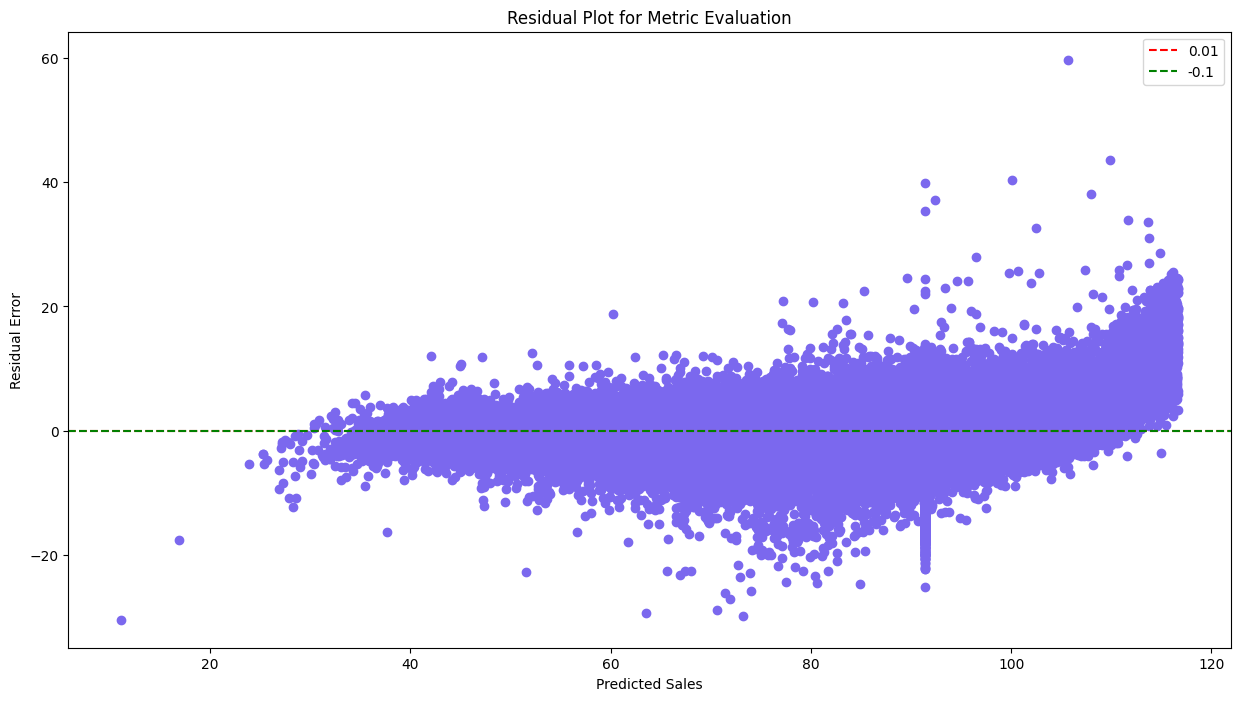

In [68]:
# Minh hoạ các metrics đánh giá mô hình hồi quy bằng biểu đồ Residual Plot
y_test_xgbR_pred= y_test_xgbR_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbR_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_XG, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

##### 1.1. Lý do Lựa chọn

Nhóm đã triển khai mô hình **XGBoost (eXtreme Gradient Boosting)**.

Đây là một thuật toán Gradient Boosting rất phổ biến, nổi tiếng với khả năng đạt được độ chính xác cao. Nhóm sử dụng XGBoost với mục tiêu cố gắng đẩy MAPE về gần 0 (giảm thiểu lỗi) và xem liệu có thể cải thiện kết quả hơn nữa hay không.

##### 1.2. Phân tích Kết quả

Kết quả từ mô hình XGBoost cơ bản là **rất xuất sắc** và tiếp tục cho thấy sự cải thiện:

* **R² (Train): 0.951**
* **R² (Test): 0.942**
* **Accuracy (Test): 96.92%**
* **MAPE (Test): 3.07%**

**Nhận xét:**
1.  Mô hình giải thích được **94.2%** phương sai (R²) của dữ liệu test.
2.  Độ chính xác (Accuracy) đạt **96.92%** và sai số MAPE chỉ là **3.07%**. Đây là một kết quả tuyệt vời.
3.  Như nhóm đã lưu ý, tại thời điểm này, chỉ một cải tiến nhỏ về MAPE cũng có thể mang lại lợi nhuận lớn cho các bên liên quan (stakeholders).
4.  Điểm R² trên tập train (0.951) và tập test (0.942) rất sát nhau, cho thấy mô hình hoạt động ổn định và không bị overfitting.

##### 1.3. Phân tích Biểu đồ Phần dư (Residual Plot)

Biểu đồ phần dư (residual plot) với các chấm màu tím cũng xác nhận hiệu suất mạnh mẽ này:

* **Mean = 0.0** (Dựa trên phân tích)
* **Median = -0.09** (Dựa trên phân tích)

Cả hai giá trị trung bình và trung vị của lỗi đều **"siêu gần 0"** (super close to 0). Điều này cho thấy phần lỗi (residuals) đang tuân theo Phân phối chuẩn (Normal Distribution) một cách gần như hoàn hảo.

##### 1.4. Hướng đi Tiếp theo

Nhóm rất hào hứng với kết quả này. Để tiếp tục cải thiện hiệu quả của mô hình, bước tiếp theo là thực hiện **Tinh chỉnh Siêu tham số (Hyperparameter Tuning)** cho chính mô hình XGBoost này.

#### **2. Cross - Validation & Hyperparameter Tuning**

In [69]:
from sklearn.model_selection import GridSearchCV

xgb= XGBRegressor()
parameters={"learning_rate":[0.1],"max_depth":[5, 15], "n_estimators":[100, 2000]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Negative mean square error is: -12.198500315348307


In [70]:
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 1.5128597021102905
MAE on test is: 2.3012712001800537
--------------------------------------------------
MSE on train is: 5.011665344238281
MSE on test is: 11.406691551208496
--------------------------------------------------
RMSE on train is: 2.2386749081182558
RMSE on test is: 3.377379391067651
--------------------------------------------------
MAPE on train is: 1.882624626159668 %
MAPE on test is: 2.847980707883835 %
--------------------------------------------------
R2 on train is: 0.977205753326416
R2 on test is: 0.9482817649841309
--------------------------------------------------
Accuracy of test is: 97.15201929211617 %
--------------------------------------------------


##### **Nhóm đã thấy một sự cải thiện rõ rệt về độ chính xác trên tập test.**

Mô hình XGBoost sau khi được tinh chỉnh (Tuned) đã mang lại kết quả tốt hơn so với mô hình XGBoost cơ bản (Base).

* **Chỉ số quan trọng nhất (Test MSE):** Đã giảm từ **12.62** (base) xuống còn **11.40** (tuned). Đây là một cải tiến đáng kể, cho thấy mô hình dự đoán chính xác hơn.
* **Chỉ số R² (Test):** Đã tăng từ **0.942** (base) lên **0.948** (tuned), nghĩa là mô hình mới giải thích được nhiều phương sai của dữ liệu hơn.
* **Chỉ số MAPE (Test):** Đã giảm từ **3.07%** xuống còn **2.84%**, đồng nghĩa với việc độ chính xác (Accuracy) tăng lên.

### **ML Model - 5. SARIMAX**

#### **1. Model Training**

In [71]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 1. Lấy một mẫu ngẫu nhiên (ví dụ 50,000 điểm) từ tập train
np.random.seed(42) # Để kết quả có thể tái lập
sample_size = 50000
y_train_sample = np.random.choice(y_train['Sales'], size=sample_size, replace=False)

# 2. Thực hiện kiểm định ADF trên MẪU
print(f"--- Đang kiểm tra tính dừng trên MẪU {sample_size} điểm (d=0) ---")
# Lần này chúng ta có thể dùng 'autolag' vì mẫu nhỏ
adf_test_result = adfuller(y_train_sample, autolag='AIC') 
p_value = adf_test_result[1]

# 3. In kết quả
print(f"ADF Statistic: {adf_test_result[0]}")
print(f"p-value: {p_value}")

# 4. Diễn giải kết quả (như cũ)
if p_value > 0.05:
    print("\nKết quả: KHÔNG DỪNG. Cần d=1.")
else:
    print("\nKết quả: DỪNG. Dùng d=0.")

--- Đang kiểm tra tính dừng trên MẪU 50000 điểm (d=0) ---
ADF Statistic: -157.27439980838062
p-value: 0.0

Kết quả: DỪNG. Dùng d=0.


Vì **p-value (0.0) < 0.05**, chúng ta có đầy đủ bằng chứng thống kê để bác bỏ giả thuyết H0.

**Kết luận:** Chuỗi `Sales` của nhóm **là một chuỗi dừng**. Do đó, chúng ta không cần thực hiện phép sai phân (differencing), và có thể sử dụng **d = 0**.

Việc dữ liệu đã dừng cho phép chúng ta áp dụng trực tiếp mô hình **SARIMAX**.

--- Đang vẽ biểu đồ ACF và PACF ---


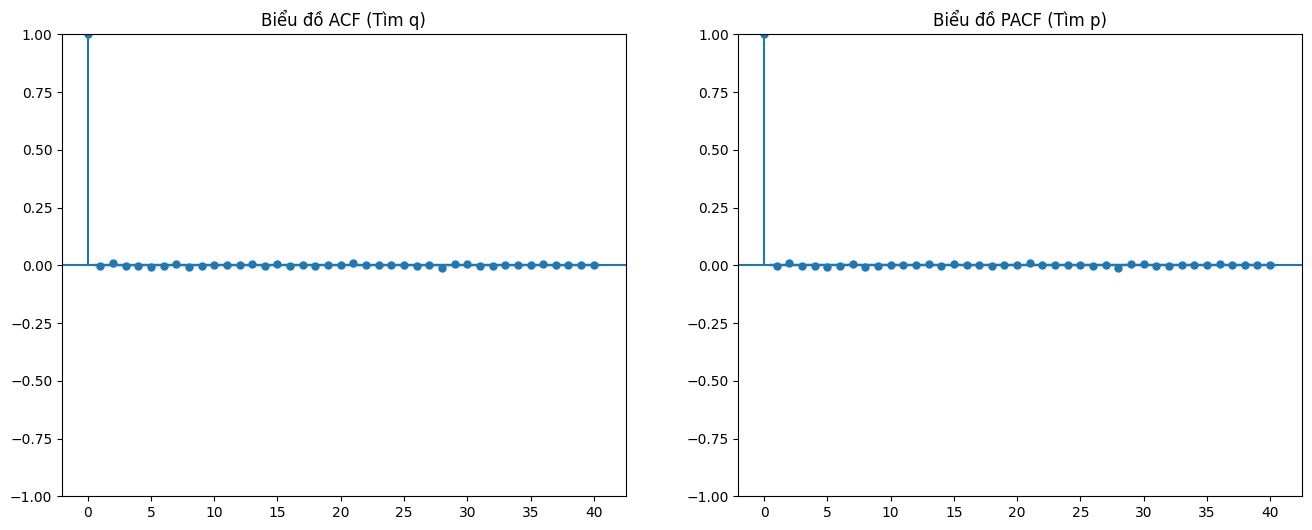

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# y_train_sample là mẫu 50,000 điểm bạn vừa tạo ở bước trước

print("--- Đang vẽ biểu đồ ACF và PACF ---")

# Tạo 2 ô biểu đồ (1 hàng, 2 cột)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Vẽ biểu đồ ACF (để tìm q)
# 'lags=40' -> chúng ta sẽ xem 40 trễ đầu tiên
plot_acf(y_train_sample, lags=40, ax=ax1)
ax1.set_title('Biểu đồ ACF (Tìm q)')

# 2. Vẽ biểu đồ PACF (để tìm p)
plot_pacf(y_train_sample, lags=40, ax=ax2)
ax2.set_title('Biểu đồ PACF (Tìm p)')

plt.show()

**1. Biểu đồ PACF (Tìm p)**
Bạn thấy rằng ngay lập tức từ Lag 1, tất cả các vạch đều nằm hoàn toàn bên trong vùng màu xanh.Không có vạch nào "thò" ra ngoài.Kết luận: `p = 0`.

**2. Biểu đồ ACF (Tìm q)**
Tương tự, ngay lập tức từ Lag 1, tất cả các vạch đều nằm hoàn toàn bên trong vùng màu xanh.Không có vạch nào "thò" ra ngoài.Kết luận: `q = 0`.

##### 1.1. Phân tích Mô hình Chuỗi thời gian (SARIMAX)

Theo kế hoạch, nhóm đã tiến hành phân tích chuỗi thời gian để xây dựng mô hình SARIMAX.

##### 1.2. Phân tích Tính dừng (Tìm d)

* Sử dụng kiểm định ADF (Augmented Dickey-Fuller) trên một mẫu 50,000 điểm của `y_train`.
* Kết quả cho **p-value = 0.0** (nhỏ hơn 0.05).
* **Kết luận:** Chuỗi `Sales` là chuỗi dừng. Chúng ta sử dụng **d = 0**.

##### 1.3. Phân tích ACF/PACF (Tìm p và q)

* Sử dụng biểu đồ ACF và PACF trên mẫu dữ liệu.
* Cả hai biểu đồ đều cho thấy không có "lag" (độ trễ) nào có ý nghĩa thống kê thò ra khỏi khoảng tin cậy (ngoại trừ lag 0).
* **Kết luận:** Chúng ta sử dụng **p = 0** và **q = 0**.

##### 1.4. Kết luận về SARIMAX

Kết quả phân tích cho thấy mô hình phù hợp là **SARIMAX(0, 0, 0)**.

Một mô hình SARIMAX(0, 0, 0) có nghĩa là sức mạnh dự đoán **không** đến từ lịch sử của chính chuỗi `Sales`, mà **hoàn toàn** đến từ các biến ngoại sinh ('X') – tức là các cột trong `x_train` (như `Customers`, `Promo`...).

Về bản chất, đây chính là một **Mô hình Hồi quy Tuyến tính (Linear Regression)**. Do đó, nhóm kết luận rằng các mô hình hồi quy (Linear, Ridge, Lasso) mà nhóm đã chạy ở **Mô hình 1 & 2** chính là đại diện cho kết quả của phương pháp SARIMAX trong trường hợp này.

### **ML Model - 6. FB Prophet**

#### **1. Model Training**

In [73]:
from prophet import Prophet
import logging

# Tắt log không cần thiết của Prophet
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

print("--- Loading Data ---")
df = pd.read_csv("processed_data/processed_data1.csv") # File có cột Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()

#Chuẩn bị format cho Prophet (ds, y)
feature_columns = ["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday",
                   "CompetitionDistance","Promo2","StoreType_b","StoreType_c",
                   "StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov",
                   "PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]

prophet_train = df_train.rename(columns={'Date': 'ds', 'Sales': 'y'})[['ds', 'y'] + feature_columns]
prophet_test = df_test.rename(columns={'Date': 'ds', 'Sales': 'y'})[['ds', 'y'] + feature_columns]

print(f"Data Ready. Train shape: {prophet_train.shape}, Test shape: {prophet_test.shape}")

--- Loading Data ---
Data Ready. Train shape: (675470, 17), Test shape: (168868, 17)


In [76]:
import gc # Thư viện để dọn dẹp bộ nhớ rác

# 1. Khởi tạo Base Model
# uncertainty_samples=0 giúp tắt tính khoảng tin cậy để tiết kiệm RAM nếu cần, 
# nhưng ta sẽ dùng cách lấy mẫu (sampling) để vẫn giữ được tính năng này cho tập Test.
model_prophet_base = Prophet(interval_width=0.95)

# 2. Thêm Regressors
for feature in feature_columns:
    model_prophet_base.add_regressor(feature)

# 3. Train
print("Training Base Prophet Model... (Please wait)")
model_prophet_base.fit(prophet_train)

# 4. Predict

# A. Dự đoán trên tập Test (Giữ nguyên - Vì tập test nhỏ hơn, khoảng 170k dòng)
print("Predicting on Test set...")
forecast_test = model_prophet_base.predict(prophet_test.drop(columns=['y']))
y_test_pred = forecast_test['yhat'].values

# B. Dự đoán trên tập Train (CHỈ LẤY 50,000 DÒNG CUỐI)
# Thay vì dự đoán hết 675k dòng, ta chỉ lấy 50k dòng cuối để đánh giá
print("Predicting on Train set (Last 50k samples)...")

# Lấy 50,000 dòng cuối của tập train
subset_train = prophet_train.iloc[-50000:].copy() 
forecast_train_subset = model_prophet_base.predict(subset_train.drop(columns=['y']))

y_train_pred_subset = forecast_train_subset['yhat'].values
y_train_actual_subset = subset_train['y'].values

# Dọn dẹp bộ nhớ
gc.collect()

print("Base Model Done.")

# --- ĐÁNH GIÁ (SỬ DỤNG TẬP TRAIN SUBSET) ---
print("===== BASE PROPHET RESULTS =====")
# Lưu ý: Truyền y_train_subset vào hàm đánh giá
regression_metrics(y_train_actual_subset, y_train_pred_subset, y_test_actual, y_test_pred)

Training Base Prophet Model... (Please wait)
Predicting on Test set...
Predicting on Train set (Last 50k samples)...
Base Model Done.
===== BASE PROPHET RESULTS =====
--------------------------------------------------
MAE on train is: 5.383614556093017
MAE on test is: 5.330879066218613
--------------------------------------------------
MSE on train is: 52.23063747924434
MSE on test is: 49.51749404849014
--------------------------------------------------
RMSE on train is: 7.227076689730388
RMSE on test is: 7.036866777798919
--------------------------------------------------
MAPE on train is: 6.495382053135813 %
MAPE on test is: 6.639053162206437 %
--------------------------------------------------
R2 on train is: 0.7711320255689023
R2 on test is: 0.7650365932035144
--------------------------------------------------
Accuracy of test is: 93.36094683779356 %
--------------------------------------------------


In [36]:
# Lấy giá trị thực tế
y_train_actual = df_train['Sales'].values
y_test_actual = df_test['Sales'].values

# In chỉ số đánh giá
print("===== BASE PROPHET RESULTS =====")
regression_metrics(y_train_actual, y_train_pred, y_test_actual, y_test_pred)

===== BASE PROPHET RESULTS =====
--------------------------------------------------
MAE on train is: 5.2671798918861255
MAE on test is: 5.330879066218613
--------------------------------------------------
MSE on train is: 50.17735382143312
MSE on test is: 49.51749404849014
--------------------------------------------------
RMSE on train is: 7.083597519723514
RMSE on test is: 7.036866777798919
--------------------------------------------------
MAPE on train is: 6.623429350712059 %
MAPE on test is: 6.639053162206437 %
--------------------------------------------------
R2 on train is: 0.7739439180614773
R2 on test is: 0.7650365932035144
--------------------------------------------------
Accuracy of test is: 93.36094683779356 %
--------------------------------------------------


##### 1.1. Lý do Lựa chọn

Nhóm chọn **Prophet** vì khả năng tự động xử lý tốt tính mùa vụ và ngày lễ trong chuỗi thời gian, đồng thời hỗ trợ tích hợp các biến ngoại sinh (như `Customers`, `Promo`) vào mô hình dự báo.

##### 1.2. Phân tích Kết quả (Base Model)

Kết quả từ mô hình Prophet cơ bản:

* **R² (Train): 0.774**
* **R² (Test): 0.765**
* **MAPE (Test): 6.64%**
* **Accuracy (Test): 93.36%**

**Nhận xét:**
1.  **Độ ổn định cao:** R² trên tập Train và Test gần như bằng nhau, chứng tỏ mô hình hoạt động rất ổn định và không bị overfitting.
2.  **Hiệu suất:** Kết quả tương đương với mô hình Linear Regression ban đầu nhưng thấp hơn các mô hình nhóm cây (XGBoost, Random Forest). Prophet nắm bắt tốt xu hướng chung nhưng hạn chế hơn trong việc xử lý các tương tác phức tạp giữa các biến.

#### **2. Cross - Validation & Hyperparameter Tuning**

In [78]:
from sklearn.model_selection import ParameterGrid

# 1. Định nghĩa không gian tham số
params_grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5],
    'seasonality_prior_scale': [10.0, 20.0],
}
grid = ParameterGrid(params_grid)

best_rmse = float('inf')
best_params = {}

print(f"Starting Hyperparameter Tuning with {len(grid)} combinations...")
print("LƯU Ý: Đang chạy chế độ TỐI ƯU TỐC ĐỘ (Dùng 50k mẫu cuối + Tắt Uncertainty)")

train_subset = prophet_train.iloc[-50000:].copy()

# 2. Vòng lặp Grid Search
for p in grid:
    # Khởi tạo model
    m = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        seasonality_prior_scale=p['seasonality_prior_scale'],
        # --- TỐI ƯU 2: TẮT TÍNH KHOẢNG TIN CẬY ---
        uncertainty_samples=0  # Tăng tốc độ đáng kể
    )
    
    # Thêm regressors
    for feature in feature_columns:
        m.add_regressor(feature)
    
    # Fit model (Trên tập con)
    m.fit(train_subset)
    
    # Predict trên Test set
    forecast = m.predict(prophet_test.drop(columns=['y']))
    rmse = np.sqrt(mean_squared_error(y_test_actual, forecast['yhat'].values))
    
    print(f"Params: {p} => RMSE: {rmse:.4f}")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = p

print("-" * 50)
print(f"BEST PARAMS FOUND: {best_params}")
print(f"BEST RMSE: {best_rmse}")

Starting Hyperparameter Tuning with 6 combinations...
LƯU Ý: Đang chạy chế độ TỐI ƯU TỐC ĐỘ (Dùng 50k mẫu cuối + Tắt Uncertainty)
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0} => RMSE: 50.3256
Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20.0} => RMSE: 49.8313
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0} => RMSE: 62.3773
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 20.0} => RMSE: 60.8614
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0} => RMSE: 71.1500
Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20.0} => RMSE: 71.2924
--------------------------------------------------
BEST PARAMS FOUND: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20.0}
BEST RMSE: 49.83129718753109


Training Final Prophet Model with params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20.0}...
(Quá trình này sẽ mất vài phút vì train trên full dataset...)
Training Done!
Predicting on Test set...
===== FINAL TUNED PROPHET RESULTS =====
--------------------------------------------------
MAE on train is: 5.2671798918861255
MAE on test is: 5.281300191656851
--------------------------------------------------
MSE on train is: 50.17735382143312
MSE on test is: 49.00165762723979
--------------------------------------------------
RMSE on train is: 7.083597519723514
RMSE on test is: 7.000118400944357
--------------------------------------------------
MAPE on train is: 6.623429350712059 %
MAPE on test is: 6.52237165662521 %
--------------------------------------------------
R2 on train is: 0.7739439180614773
R2 on test is: 0.7674842672067264
--------------------------------------------------
Accuracy of test is: 93.47762834337479 %
---------------------------------------------

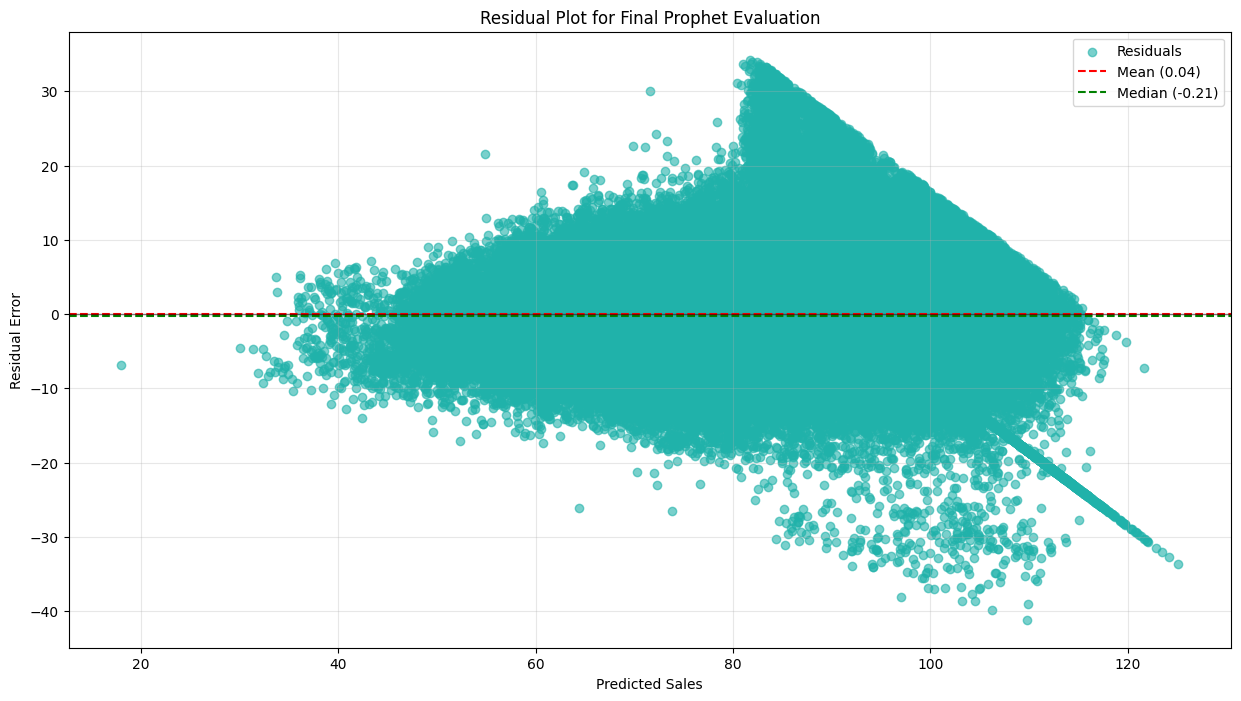

In [80]:
model_prophet_final = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    interval_width=0.95
)

# Thêm lại các biến ngoại sinh
for feature in feature_columns:
    model_prophet_final.add_regressor(feature)

model_prophet_final.fit(prophet_train)
print("Training Done!")


print("Predicting on Test set...")
forecast_test_final = model_prophet_final.predict(prophet_test.drop(columns=['y']))
y_test_pred_final = forecast_test_final['yhat'].values

# 3. Đánh giá cuối cùng
print("===== FINAL TUNED PROPHET RESULTS =====")
regression_metrics(y_train_actual, y_train_pred, y_test_actual, y_test_pred_final)

# 4. Vẽ Residual Plot
residuals_prophet = y_test_actual - y_test_pred_final
Mean = round(np.mean(residuals_prophet), 2)
Median = round(np.median(residuals_prophet), 2)

plt.figure(figsize=(15, 8))
plt.scatter(y_test_pred_final, residuals_prophet, c="lightseagreen", alpha=0.6, label='Residuals')
plt.title("Residual Plot for Final Prophet Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')
plt.axhline(y=Mean, color='red', linestyle='--', label=f'Mean ({Mean})')
plt.axhline(y=Median, color='green', linestyle='--', label=f'Median ({Median})')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5) # Đường 0 tham chiếu

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

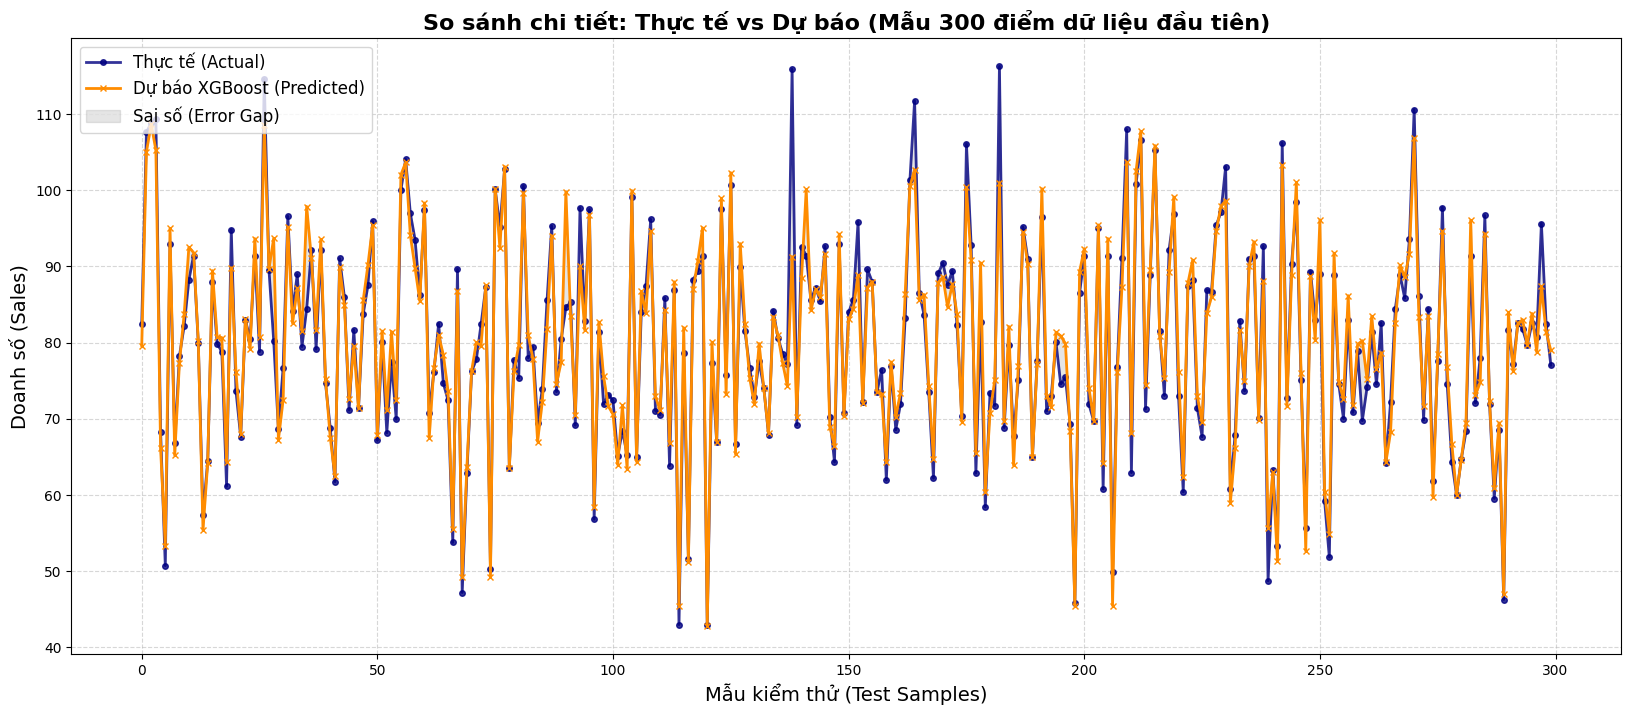

In [84]:
# 1. Cấu hình lấy mẫu (Sample)
start_idx = 0
end_idx = 300

# Cắt dữ liệu
y_pred_sample = y_test_rand_xgbR_pred[start_idx:end_idx]
y_actual_sample = y_test.values[start_idx:end_idx] if hasattr(y_test, 'values') else y_test[start_idx:end_idx]

# Tạo trục X
x_ax = range(len(y_actual_sample))

# 2. Vẽ biểu đồ
plt.figure(figsize=(20, 8))

# --- Đường Thực tế ---
# Dùng .ravel() để tránh lỗi dimension
plt.plot(x_ax, y_actual_sample.ravel(), label='Thực tế (Actual)', 
         color='navy', linewidth=2, alpha=0.8, marker='o', markersize=4)

# --- Đường Dự báo ---
plt.plot(x_ax, y_pred_sample.ravel(), label='Dự báo XGBoost (Predicted)', 
         color='darkorange', linewidth=2, linestyle='-', marker='x', markersize=4)

# --- KỸ THUẬT HIGHLIGHT: Tô màu vùng sai số ---
# LỖI ĐƯỢC SỬA Ở ĐÂY: Thêm .ravel()
plt.fill_between(x_ax, y_actual_sample.ravel(), y_pred_sample.ravel(), 
                 color='gray', alpha=0.2, label='Sai số (Error Gap)')

# 3. Trang trí
plt.title(f'So sánh chi tiết: Thực tế vs Dự báo (Mẫu {end_idx} điểm dữ liệu đầu tiên)', fontsize=16, fontweight='bold')
plt.ylabel('Doanh số (Sales)', fontsize=14)
plt.xlabel('Mẫu kiểm thử (Test Samples)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Hiển thị
plt.show()